<h1><center>Climate Change Belief Analysis 2022</center></h1>

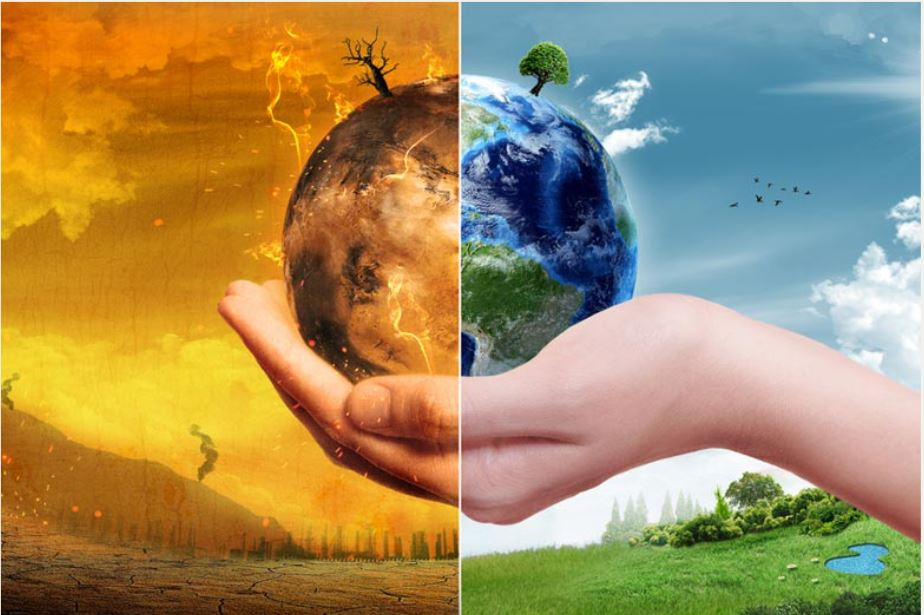

# Table of Contents <a id="contents"></a>

1. [Introduction](#introduction) <br>
    1.1. [Problem Statement](#problem_statement) <br>
    1.2. [Importing Libraries](#importing_libraries) <br>
    1.3. [Data Description](#data) <br>
    1.4. [Loading Data](#loading_data) <br><br>
    
2. [Data Preprocessing](#preprocessing) <br>
    2.1 [Checking for Null Entries](#null_entries) <br>
    2.2 [Checking for Empty Strings](#empty_strings) <br>
    2.3 [Masking User Handles](#user_handles) <br>
    2.4 [Replacing URLs](#urls) <br>
    2.5 [Delete Punctuations, Numbers and Special Characters](#punctuations) <br>
    2.6 [Removing Stopwords, Converting Words to Lowercase and Lemmatizing](#stopwords) <br><br>

3. [Exploratory Data Analysis](#EDA) <br>
    3.1 [Creating WordCloud](#wordcloud) <br><br>
   
4. [Modeling](#model) <br>
    4.1 [Handling Imbalance Datasets](#imbalancedata) <br>
     <font color=white>.....</font>4.1.1. [Without Resampling](#withoutresample) <br>
     <font color=white>.....</font>4.1.2. [Resampling with Upsampling Technique](#upsample) <br>
     <font color=white>.....</font>4.1.3. [Resampling with Downsampling Technique](#downsample) <br>
     <font color=white>.....</font>4.1.4. [Resampling with SMOTE Technique](#smote) <br>
    4.2 [Model Training](#modeltraining) <br>
     <font color=white>.....</font>4.2.1. [Logistic Regression](#logisticregression) <br>
     <font color=white>.....</font>4.2.2. [Naive Bayes](#naivebayes) <br>
     <font color=white>.....</font>4.2.3. [Support Vector Machine Models](#linearsvc) <br><br>
    
5. [Conclusion and Recommendation](#conclusion_and_recommendation) <br>
    5.1 [Conclusion](#conclusion) <br>
    5.2 [Recommendation](#recommendation) <br><br>

6. [References](#references) <br>

## 1. Introduction<a id="introduction"></a>
[Table of Contents](#contents)

A shift in a region's regular weather patterns is referred to as climate change<sup>5</sup>. The Earth's climate has grown in temperature during the previous few decades. Local climates all throughout the world are being affected by this trend.

Weather changes are unavoidable. However, weather and climate are not synonymous. The change in temperature and precipitation in a location from day to day is referred to as weather<sup>5</sup>. By glancing outside, you can describe the weather in your neighborhood. Today's weather is if it's snowing right now. Climate, on the other hand, refers to a location's average weather across time. The weather has the potential to change abruptly.

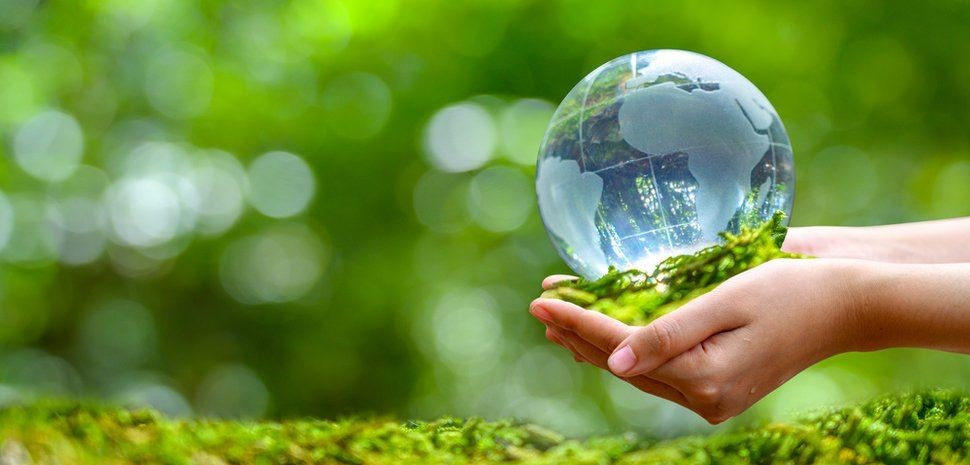

#### Why is the climate changing?

These changes to Earths' climate are not natural shifts. Scientists are confident that human activities are leading to climate change<sup>5</sup>. Human activities release gases that change the makeup of Earths' atmosphere. These gases are making our atmosphere better at trapping the Sun's heat. We call this the greenhouse effect. The greenhouse effect is the main cause of rising temperatures.

So what is the greenhouse effect? Plants can grow better in a greenhouse because it stays warmer than the outside air. This is because heat from the Sun is able to enter the clear glass or plastic. The heat warms the air inside. The heat from the trapped air keeps the greenhouse warm.

### 1.1 Problem Statement<a id="problem_statement"></a>
[Table of Contents](#contents)

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

### 1.2 Importing Libraries <a id="importing_libraries"></a>
[Table of Contents](#contents)

In [129]:
import numpy as np
import pandas as pd

# Natural Language Toolkit
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

# plotting
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
sns.set()

#Model packages
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, SVMSMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.utils import resample
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

#Metrics/Evaluation
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics

from sklearn.model_selection import cross_val_score

#comet
import comet_ml
from comet_ml import Experiment, OfflineExperiment

import warnings
warnings.filterwarnings("ignore")

### 1.3 Data Description<a id="data"></a>
[Table of Contents](#contents)

Data The collection of this data was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo. The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected. Each tweet is labelled as one of the following classes:

Class Description:

| ID | Class Name | Description |
| :- | :- | :- |
| 2 | News | The tweet links to factual news about climate change |
| 1 | Pro | The tweet supports the belief of man-made climate change |
| 0 | Neutral | The tweet neither supports nor refutes the belief of man-made climate change |
| -1 | Anti | The tweet does not believe in man-made climate change |

Variable definitions:

| Variable | Definition |
| :- | :- |
| sentiment | Sentiment of tweet |
| message | Tweet body |
| tweetid | Twitter unique id |


Files available for download
* train.csv - You will use this data to train your model.
* test.csv - You will use this data to test your model.
* SampleSubmission.csv - is an example of what your submission file should look like. The order of the rows does not matter, but the names of the tweetid's must be correct.

### 1.4 Loading Data<a id="loading_data"></a>
[Table of Contents](#contents)

Let's download the train and test datasets.

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test_with_no_labels.csv')

NameError: name 'pd' is not defined

The dataframes will be copied so as to make sure the initial dataframes do not change. 

In [3]:
df_train2 = df_train.copy()
df_test2 = df_test.copy()

Let’s check the first few rows of the both datasets.

In [4]:
df_train2.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [5]:
df_test2.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


## 2. Data Preprocessing<a id="preprocessing"></a>
[Table of Contents](#contents)

Data preprocessing is a component of data preparation. In this context, it refers to any type of processing performed on raw data to prepare it for the Exploratory Data Analysis section. 

Before we get started with this section, we will connect out notebook to Comet.ml. Comet.ml is; 

"*...a Machine Learning experimentation platform which AI researchers and data scientists use to track, compare and explain their ML experiments. It allows ML practitioners to keep track of their databases, history of performed experiments, code modifications and production models.*"<sup>6</sup>

In [1]:
# Instantiating a comet.ml instance
experiment = OfflineExperiment(
    '''Create an experiment with your api key'''
    api_key="CpBbrbaITy6jSvSwej7kzvX7v",
    project_name="climate-change-belief-analysis",
    workspace="othuke",
    offline_directory="/experiments1"
)
experiment.set_name('Preprocessing')

NameError: name 'OfflineExperiment' is not defined

Initial data cleaning requirements that we can think of after looking at the top 5 records:

- The Twitter handles are not masked. We will mask them as *@user*.

- All URLs will be replaced with the word *url*.

- We also get rid of the punctuations, numbers and special characters as they add no value to the machine learning process.

- Most of the smaller words do not add much value. For example, ‘of’, ‘his’, ‘all’. These are called *stopwords*. We will remove them from our data.

- Once we have executed the above steps, we can split every Tweet into individual words. i.e tokens, which is an essential step in any NLP task.

- In the 5th tweet of the train dataset, there is a word ‘racist’. We might also have terms like racism, race, racial, racialist etc. in the rest of the data. These terms are often used in the same context. If we can reduce them to their root word, which is ‘race’, then we can reduce the total number of unique words in our data without losing a significant amount of information. This process is known as *lemmatization*.

- Converting all text to one case. Lowercase will be used here.

But first, let us start by doing the most basic data cleaning processes which include;
- Checking if there are any nulls in the datasets
- Checking if any strings in the datasets are empty

### 2.1 Checking for Null Entries <a id="null_entries"></a>
[Table of Contents](#contents)

In [7]:
# checking nulls in the train set
df_train2.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [8]:
# checking nulls in the test set
df_test2.isnull().sum()

message    0
tweetid    0
dtype: int64

Both datasets have no *Null* values, therefore, no action needs to be taken at this stage.

### 2.2 Checking for Empty Strings<a id="empty_strings"></a>
[Table of Contents](#contents)

In [9]:
# checking for empty strings in the train dataframe
# start with an empty list
empty_str = [] 

# iterate over the dataframe
for i,sentiment,message,tweetid in df_train2.itertuples():  
    """ Checking for empty strings"""
    # only loop through string values
    if type(message)==str:            
        # check for whitespace
        if message.isspace():         
            # if true, append index numbers to empty_str list
            empty_str.append(i)     
        
print(len(empty_str), 'Empty String(s): ', empty_str)

0 Empty String(s):  []


In [10]:
# checking for empty strings in the test dataframe
# start with an empty list
empty_str = [] 

# iterate over the dataframe
for i,message,tweetid in df_test2.itertuples():  
    """ Checking for empty strings"""
    # only loop through string values
    if type(message)==str: 
        # check for whitespace
        if message.isspace():
            # if true, append index numbers to empty_str list
            empty_str.append(i)     
        
print(len(empty_str), 'Empty String(s): ', empty_str)

0 Empty String(s):  []


Both datasets have no empty strings, therefore, no action needs to be taken at this stage.

### 2.3 Masking User Handles<a id="user_handles"></a>
[Table of Contents](#contents)

We are masking the Twitter handles with @user because;
- of privacy concerns. 
- they hardly give any information about the nature of the tweet/sentiments
- having different handle names will add to the total number of unique words in our data 

In [11]:
# masking handles names to @user on train dataset
# define the regular pattern to recognize user handles 
regex_pattern = r'\B@\w+'
# define the substitute text that will be used to replace handle name
sub_text = r'@user'

# replace user handle with substitute text on train dataset
df_train2['message'] = df_train2['message'].replace(to_replace = regex_pattern, value = sub_text, regex = True)


# replace user handle with substitute text on test dataset
df_test2['message'] = df_test2['message'].replace(to_replace = regex_pattern, value = sub_text, regex = True)

Let us check if the masking was successful. 

In [12]:
df_train2.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @user: Researchers say we have three years ...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @user: It's 2016, and a racist, sexist, cli...",466954


In [13]:
df_test2.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@user @user @user @user \nPutin got to you too...,476263
4,RT @user: 'Female orgasms cause global warming...,872928


We have successfully masked the user handles for both the train and test dataframes. 

### 2.4 Replacing URLs<a id="urls"></a>
[Table of Contents](#contents)

URLs will be replaced with the word *url*;
- so as to reduce the number of unique values
- because they add no value to our machine learning process. 

In [14]:
# replacing URLs with the word url on train and test datasets
# define the regular pattern to recognize the URLs
regex_pattern = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
# define the substitute text that will be used to replace the URLs
sub_text = r'url'

# replace URLs with substitute text on train datatset
df_train2['message'] = df_train2['message'] .replace(to_replace = regex_pattern, value = sub_text, regex = True)

# replace URLs with substitute text on test datatset
df_test2['message'] = df_test2['message'] .replace(to_replace = regex_pattern, value = sub_text, regex = True)

### 2.5 Delete Punctuations, Numbers and Special Characters<a id="punctuations"></a>
[Table of Contents](#contents)

This step is necessary because punctuations, numbers and special characters don't help in differentiating different kinds of tweets. If we skip this step, there is a higher chance that we will be working with noisy and inconsistent data. We will be replacing everything except characters and hashtags with spaces.

In [15]:
# remove special characters, numbers, punctuations on train and test datasets
# define the regular pattern 
regex_pattern = r'[^a-zA-Z#]'
# define the substitute text as a whitespace
sub_text = r' '

# replace the characters on train dataframe
df_train2['message'] = df_train2['message'] .replace(to_replace = regex_pattern, value = sub_text, regex = True)

# replace the characters on test dataframe
df_test2['message'] = df_test2['message'] .replace(to_replace = regex_pattern, value = sub_text, regex = True)

### 2.6 Removing Stopwords, Converting Words to Lowercase, and Lemmatizing<a id="stopwords"></a>
[Table of Contents](#contents)

Stopwords do not contribute much to the machine learning model, so it's good to remove them. A list of stopwords have been defined by the Natural Language Toolkit (nltk) library so we will start by downloading them.

Lemmatization is defined as "doing things properly using vocabulary and morphological analysis of words"<sup>1</sup>. This process returns the base form of a word, i.e, the *lemma*.
Example: Better - Good. For this step,  we will download WordNet from nltk. WordNet is a lexical database of English which helps find conceptual relationships between words.<sup>2</sup>

In [16]:
# downloading stopwrods from nltk
# nltk.download('stopwords')
# nltk.download('wordnet')

In [17]:
# initialize set of stopwords from English dictionary
stop_words = set(stopwords.words("english")) 
# initialize a lemmatizer
lemmatizer = WordNetLemmatizer()

# define function to clean the tweets
def clean_tweet(text):
    # convert the text to lowercase
    text = text.lower()
    # lemmatization + tokenization process
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    # removing stopwords
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text

# cleaning train dataset
df_train2['cleaned_message'] = df_train2.message.apply(lambda x: clean_tweet(x))

# cleaning test dataset
df_test2['cleaned_message'] = df_test2.message.apply(lambda x: clean_tweet(x))

Let us have a look at what the clean data looks like!

In [18]:
# checking the preprossed train dataframe 
df_train2.head()

,sentiment,message,tweetid,cleaned_message
0,1,PolySciMajor EPA chief doesn t think carbon di...,625221,polyscimajor epa chief think carbon dioxide ma...
1,1,It s not like we lack evidence of anthropogeni...,126103,like lack evidence anthropogenic global warm
2,2,RT user Researchers say we have three years ...,698562,rt user researcher say three year act climat...
3,1,#TodayinMaker# WIRED was a pivotal year...,573736,#todayinmaker# wire wa pivotal year war...
4,1,RT user It s and a racist sexist cli...,466954,rt user racist sexist climate change...


In [19]:
# checking the preprossed test dataframe 
df_test2.head()

,message,tweetid,cleaned_message
0,Europe will now be looking to China to make su...,169760,europe look china make sure alone fight climat...
1,Combine this with the polling of staffers re c...,35326,combine poll staffer climate change woman rig...
2,The scary unimpeachable evidence that climate...,224985,scary unimpeachable evidence climate change a...
3,user user user user Putin got to you too ...,476263,user user user user putin get jill tru...
4,RT user Female orgasms cause global warming...,872928,rt user female orgasm cause global warm ...


The preprocessed dataframes look good! We will not move to Exploratory Data Analysis.

## 3. Exploratory Data Analysis<a id="EDA"></a>
[Table of Contents](#contents)

Exploratory Data Analysis is a critical process which involves performing initial investigations on data with the aim of discovering patterns, spotting anomalies, testing hypothesis and checking assumptions with the help of summary statistics and graphical representations<sup>7</sup>.

In this step, we will start by checking the News, Pro, Neutral and Anti messages frequency distribution in the train dataframe.  

In [20]:
# initialize news, pro, neutral and anti messages
news = df_train2[df_train2['sentiment'] == 2]['cleaned_message']
pro = df_train2[df_train2['sentiment'] == 1]['cleaned_message']
neutral =df_train2[df_train2['sentiment'] == 0]['cleaned_message']
anti = df_train2[df_train2['sentiment'] ==-1]['cleaned_message']

print('Number of news tagged sentences is:     {}'.format(len(news)))
print('Number of pro tagged sentences is:      {}'.format(len(pro)))
print('Number of neutral tagged sentences is:  {}'.format(len(neutral)))
print('Number of anti tagged sentences is:     {}'.format(len(anti)))
print('Total length of the data is:            {}'.format(df_train2.shape[0]))

Number of news tagged sentences is:     3640
Number of pro tagged sentences is:      8530
Number of neutral tagged sentences is:  2353
Number of anti tagged sentences is:     1296
Total length of the data is:            15819


Here is a graphical representation of the same;

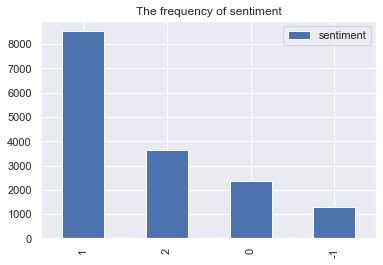

In [21]:
df_train2['sentiment'].value_counts().plot(kind ='bar')
#labels = df_train2['sentiment'].unique()
#label_title = ['pro', 'news', 'neutral', 'anti']
plt.title ('The frequency of sentiment')
#plt.xticks(labels)
plt.legend()
experiment.log_figure(figure_name = 'Sentiment class') #upload figure to comet
plt.show()


Considering the size of the dataset, the count of sentences do not seem to be equally distributed between **news, pro, neutral** and **anti**.  **Pro** has the most number of Tweets followed by **news** then **neutral** and finally **anti**. This means that majority of the tweets in this data set support the belief that climate-change is man-made while a majority of the Tweets are opposed to this. 

This uneven distribution of sentiments will affect the accuracy of our model(s). To solve this imbalance, resampling method  (Downscalling and Upscalling), which will involve modifying the number of observations in each class, will be used.

### 3.1 Creating WordCloud<a id="wordcloud"></a>
[Table of Contents](#contents)

We can now analyze the data to get further understanding of it by plotting word clouds for news, pro, neutral and anti tweet messages from our train dataset and see which words occur the most.

A word cloud is a collection of words depicted in different sizes. The bigger and bolder the word appears, the more often it's mentioned within a dataset. We will used the WordCloud library for this scenario. 

From this graphical representation, we can see that the two placeholder values we used during data preprocessing, *@user* and *@url* have weight on the word count yet they do not add any value to our machine learning process. We will therefore delete them on both train and test dataframes. 

In [22]:
# replace @user and url with whitespace on train dataframe
df_train2['cleaned_message'] = df_train2['cleaned_message'] .replace(to_replace = '@user', value = ' ', regex = True)
df_train2['cleaned_message'] = df_train2['cleaned_message'] .replace(to_replace = 'url', value = ' ', regex = True)

# replace @user and urlwith whitespace on test dataframe
df_test2['cleaned_message'] = df_test2['cleaned_message'] .replace(to_replace = '@user', value = ' ', regex = True)
df_test2['cleaned_message'] = df_test2['cleaned_message'] .replace(to_replace = 'url', value = ' ', regex = True)

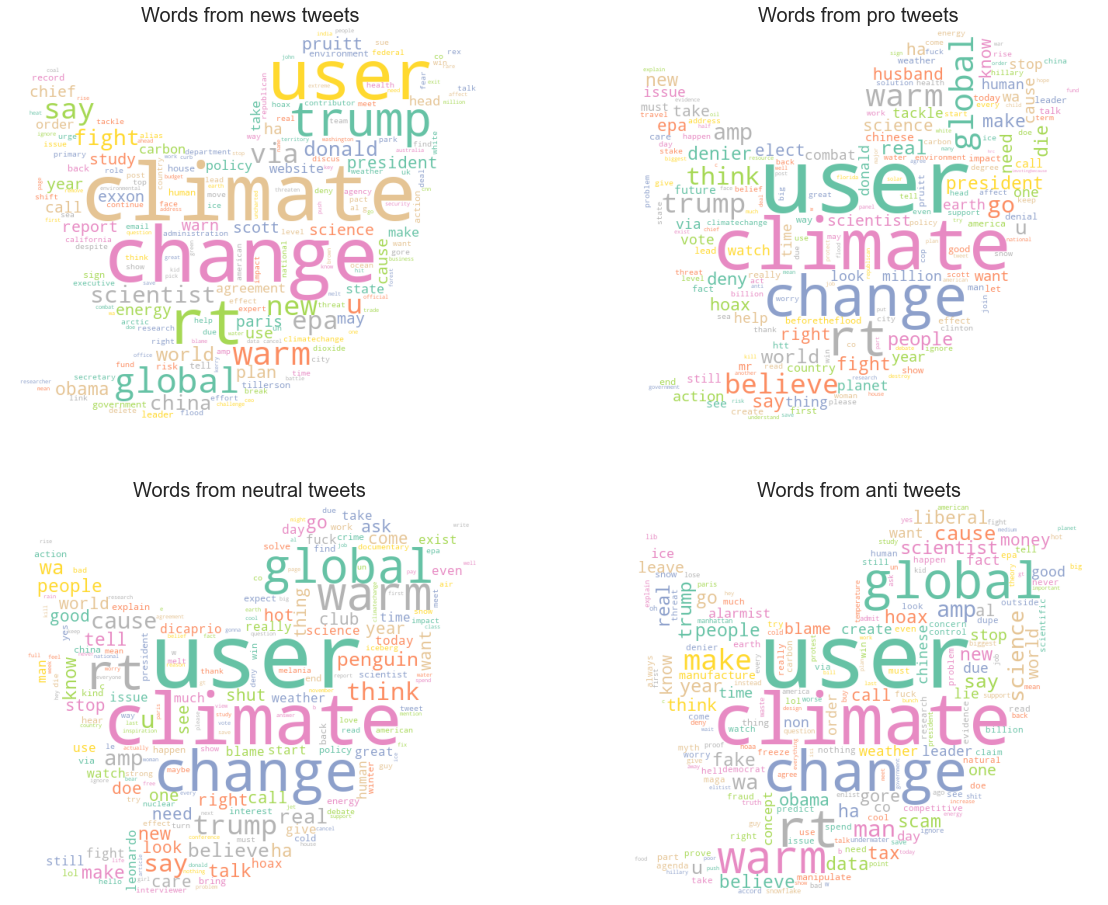

In [23]:
# Generate wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

# initialize news, pro, neutral and anti messages
news = df_train2[df_train2['sentiment'] == 2]['cleaned_message']
pro = df_train2[df_train2['sentiment'] == 1]['cleaned_message']
neutral =df_train2[df_train2['sentiment'] == 0]['cleaned_message']
anti = df_train2[df_train2['sentiment'] ==-1]['cleaned_message']

news = [word for line in news for word in line.split()]
pro = [word for line in pro for word in line.split()]
neutral = [word for line in neutral for word in line.split()]
anti= [word for line in anti for word in line.split()]

# Define a function to plot word cloud
def plot_cloud(news, pro, neutral, anti):
    # Import image to np.array
    #mask = np.array(Image.open('comment.png'))
    mask1 = np.array(Image.open('twitter1.png'))
    
    news = WordCloud(random_state=1, background_color='white', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS, mask=mask1).generate(' '.join(news))
    
    pro = WordCloud(random_state=1, background_color='white', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS, mask=mask1).generate(' '.join(pro))
    
    neutral = WordCloud(random_state=1, background_color='white', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS, mask=mask1).generate(' '.join(neutral))
    
    anti = WordCloud(random_state=1, background_color='white', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS, mask=mask1).generate(' '.join(anti))
    # Set figure size
    plt.figure(figsize = (20,16))
    plt.subplot(2,2,1)
    plt.title('Words from news tweets', fontsize = 20)
    # Display image
    plt.imshow(news) 
    # No axis details
    plt.axis("off")
    
    
    plt.subplot(2,2,2)
    plt.title('Words from pro tweets', fontsize = 20)
    # Display image
    plt.imshow(pro) 
    # No axis details
    plt.axis("off")
    
    
    plt.subplot(2,2,3)
    plt.title('Words from neutral tweets', fontsize = 20)
    # Display image
    plt.imshow(neutral) 
    # No axis details
    plt.axis("off")
    

    plt.subplot(2,2,4)
    plt.title('Words from anti tweets', fontsize = 20)
    # Display image
    plt.imshow(anti) 
    # No axis details
    plt.axis("off")
    experiment.log_figure(figure_name = 'Tweets wordcloud')
    

plot_cloud(news, pro, neutral, anti)

## 4. Modeling<a id="model"></a>
[Table of Contents](#contents)

A machine learning model refers to a file that has been trained to identify certain types of patterns. A model is trained over a set of data by providing it an algorithm which it can use to reason over and learn from those data<sup>8</sup>.

Once the model has been trained, it can be used to reason over data that it hasn't seen before, and make predictions about those data.

### 4.1 Handling Imbalance Datasets<a id="imbalancedata"></a>
[Table of Contents](#contents)

During preprocessing, we noticed that our data is imbalanced. This could cause an issue during the modeling stage. We will therefore start by trying to rectify the data imbalance. This will be done right before we split our data into feature (X) and target (y).

#### 4.1.1 Without Resampling<a id="withoutresample"></a>
[Table of Contents](#contents)

For experimental purposes, we will first split the data before we try any resampling methods.

In [24]:
#define features and target
X = df_train2['cleaned_message']
y = df_train2['sentiment']    

#### 4.1.2 Resampling with Upsampling Technique<a id="upsample"></a>
[Table of Contents](#contents)

Upsampling or Oversampling refers to the technique to create artificial or duplicate data points or of the minority class sample to balance the class label.

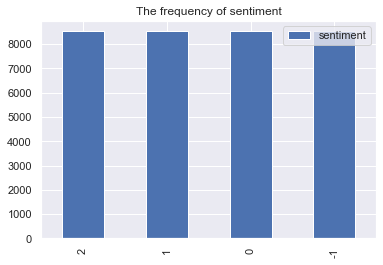

In [25]:
# initialize the sentiment classes
news = df_train2[df_train2['sentiment'] == 2]
pro = df_train2[df_train2['sentiment'] == 1]
neutral =df_train2[df_train2['sentiment'] == 0]
anti = df_train2[df_train2['sentiment'] ==-1]

# upsample the minority classes
news_upsample = resample(news, 
                           replace=True,
                           n_samples=len(pro), 
                           random_state=42)

neutral_upsample = resample(neutral, 
                           replace=True,
                           n_samples=len(pro), 
                           random_state=42)

anti_upsample = resample(anti, 
                           replace=True,
                           n_samples=len(pro), 
                           random_state=42)

# concatenate the upsampled dataframe
df_train2_upsample = pd.concat([news_upsample, pro, neutral_upsample ,anti_upsample])
df_train2_upsample['sentiment'].value_counts().plot(kind ='bar')
plt.title ('The frequency of sentiment')
plt.legend()
experiment.log_figure(figure_name = 'Upsampling')
plt.show()

#Split upsample into features and target
X_upsample = df_train2_upsample['cleaned_message']
y_upsample = df_train2_upsample['sentiment']

#### 4.1.3 Resampling with Downsampling Technique<a id="downsample"></a>
[Table of Contents](#contents)

Downsampling is generally preceded by an antialiasing filter to reduce undesired noise, i.e., each resulting sample corresponds to the average of a certain number of original samples (sample rate). This process is known as “decimation”.

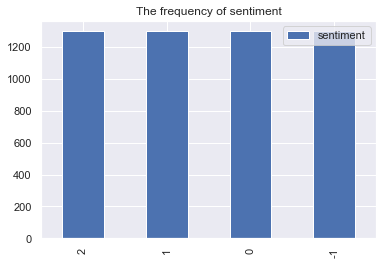

In [26]:
# initialize the sentiment classes
news = df_train2[df_train2['sentiment'] == 2]
pro = df_train2[df_train2['sentiment'] == 1]
neutral =df_train2[df_train2['sentiment'] == 0]
anti = df_train2[df_train2['sentiment'] ==-1]

# downsample the minority classes

news_downsample = resample(news, 
                           replace=True,
                           n_samples=len(anti), 
                           random_state=42)

pro_downsample = resample(pro, 
                           replace=True,
                           n_samples=len(anti), 
                           random_state=42)

neutral_downsample = resample(neutral, 
                           replace=True,
                           n_samples=len(anti), 
                           random_state=42)


# concatenate the downsampled dataframe
df_train2_downsample = pd.concat([news_downsample, pro_downsample, neutral_downsample ,anti])
df_train2_downsample['sentiment'].value_counts().plot(kind ='bar')
plt.title ('The frequency of sentiment')
plt.legend()
experiment.log_figure(figure_name = 'Downsampling')
plt.show()

#Split downsample into features and target
X_downsample = df_train2_downsample['cleaned_message']
y_downsample = df_train2_downsample['sentiment']

#### 4.1.4 Resampling with SMOTE Technique<a id="smote"></a>
[Table of Contents](#contents)

SMOTE stands for Synthetic Minority Oversampling Technique. This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input.

In [27]:
vect = TfidfVectorizer(max_df=0.90, min_df=1, ngram_range=(1,2), stop_words='english')

# bag-of-words feature matrix
X_vect = vect.fit_transform(X)

# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(random_state = 2) 
svmsmote = SVMSMOTE(random_state = 101, svm_estimator = svm.SVC(kernel='linear'), sampling_strategy='not majority')

# Fit the model to generate the data.
X_smote, y_smote = svmsmote.fit_resample(X_vect, y)


{'web': None, 'api': None, 'imageId': 'a0875b1af9d74482b7f41b482371447f'}

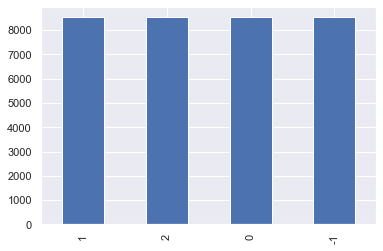

In [28]:
#Visualize smote
y_smote.value_counts().plot(kind='bar')
experiment.log_figure(figure_name = 'SMOTE')

### Creating train model function

To avoid redundancy, we will create a function to handle the train model. This function will take an instantiated model variable as well as the features (X) and target (y) variables and return a the f1, accuracy, precision and recall scores of the model that was passed.

In [29]:
def train_model(model, X, y, smote='No'):
    """create train model function"""
    # Create an instance of experiment with your api key
    experiment = OfflineExperiment(
    api_key="CpBbrbaITy6jSvSwej7kzvX7v",
    project_name="climate-change-belief-analysis",
    workspace="othuke",
    offline_directory="/experiments1"
    )
    
    pipe = Pipeline([('vect', TfidfVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 3))),('tfidf', TfidfTransformer()),('model', model)])
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=20)
    
    if smote == 'No':
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        f1 = f1_score(y_test, y_pred, average='weighted')
        acc = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        
    
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        f1 = f1_score(y_test, y_pred, average='weighted')
        acc = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        
    
    print('Accuracy: ', acc)
    print('f1_score: ', f1)
    print('Recall: ', recall)
    print('Precision: ', precision)
    
    metrics = {'Accuracy':acc, 'f1_score':f1, 'Recall': recall, 'Precision':precision}
    experiment.log_metrics(metrics)
    experiment.end()
    return f1, acc, recall, precision
    

### 4.2 Model Training<a id="modeltraining"></a>
[Table of Contents](#contents)

It's time to train our model now that we've done some pre-processing, EDA, and resampling of our unbalanced data. We'll use a few algorithms from the `sklearn` package to train our model, evaluate its performance, and select the best model, which will be improved by hyperparameter tuning to provide a better forecast.

On various sampled data, ranging from unsampled data to sampling with the SMOTE technique, the following algorithms will be used:
1. Logistic Regression Model
2. Naive Bayes Model
3. Support Vector Classifiers 
4. XGboost

#### 4.2.1 Logistic Regression<a id="logisticregression"></a>
[Table of Contents](#contents)

Logistic Regression (aka logit, MaxEnt) classifier.

In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’. (Currently the ‘multinomial’ option is supported only by the ‘lbfgs’, ‘sag’, ‘saga’ and ‘newton-cg’ solvers.)

This class implements regularized logistic regression using the ‘liblinear’ library, ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ solvers. Note that regularization is applied by default. It can handle both dense and sparse input. Use C-ordered arrays or CSR matrices containing 64-bit floats for optimal performance; any other input format will be converted (and copied).

The ‘newton-cg’, ‘sag’, and ‘lbfgs’ solvers support only L2 regularization with primal formulation, or no regularization. The ‘liblinear’ solver supports both L1 and L2 regularization, with a dual formulation only for the L2 penalty. The Elastic-Net regularization is only supported by the ‘saga’ solver.

In [30]:
# Instantiating the Logistic Regression model
logreg = LogisticRegression()

In [31]:
%%time
#Without Resampling
lr_f1, lr_acc, lr_rec, lr_pre = train_model(logreg, X, y)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET INFO: ----------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ----------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Others:
COMET INFO:     Name               : Preprocessing
COMET INFO:     offline_experiment : True
COMET INFO:   Uploads:
COMET INFO:     conda-info               : 1
COMET INFO:     conda-specification      : 1
COMET INFO:     environment details      : 1
COMET INFO:     figures                  : 5
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (8.74 MB)
COMET 

Accuracy:  0.693109987357775
f1_score:  0.6522353552403879
Recall:  0.693109987357775
Precision:  0.7211916860056705


COMET INFO: To upload this offline experiment, run:
    comet upload /experiments1\0b8a3dfbd9784c339b444ca8e19cb9d5.zip


Wall time: 21.5 s


In [32]:
%%time
# With upsampling
lr_up_f1, lr_up_acc, lr_up_rec, lr_up_pre = train_model(logreg, X_upsample, y_upsample)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: ----------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ----------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics:
COMET INFO:     Accuracy  : 0.9176436107854631
COMET INFO:     Precision : 0.9178393680743332
COMET INFO:     Recall    : 0.9176436107854631
COMET INFO:     f1_score  : 0.916070953485471
COMET INFO:   Others:
COMET INFO:     offline_experiment : True
COMET INFO:   Uploads:

Accuracy:  0.9176436107854631
f1_score:  0.916070953485471
Recall:  0.9176436107854631
Precision:  0.9178393680743332


COMET INFO: Starting saving the offline archive
COMET INFO: To upload this offline experiment, run:
    comet upload /experiments1\c1f916ce78af4f00ae77bba2e83ddc32.zip


Wall time: 24.2 s


In [33]:
%%time
# With downsampling
lr_down_f1, lr_down_acc, lr_down_rec, lr_down_pre = train_model(logreg, X_downsample, y_downsample)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.


Accuracy:  0.7049180327868853
f1_score:  0.7036098375071042
Recall:  0.7049180327868853
Precision:  0.707827746343968


COMET INFO: ----------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ----------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics:
COMET INFO:     Accuracy  : 0.7049180327868853
COMET INFO:     Precision : 0.707827746343968
COMET INFO:     Recall    : 0.7049180327868853
COMET INFO:     f1_score  : 0.7036098375071042
COMET INFO:   Others:
COMET INFO:     offline_experiment : True
COMET INFO:   Uploads:
COMET INFO:     conda-info               : 1
COMET INFO:     conda-specification      : 1
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (8.79 MB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 1

Wall time: 12.4 s


In [34]:
%%time
#With SMOTE
lr_smote_f1, lr_smote_acc, lr_smote_rec, lr_smote_pre = train_model(logreg, X_smote, y_smote, 'smote')

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: ----------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ----------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics:
COMET INFO:     Accuracy  : 0.88042203985932
COMET INFO:     Precision : 0.8799012635654099
COMET INFO:     Recall    : 0.88042203985932
COMET INFO:     f1_score  : 0.8793540948564308
COMET INFO:   Others:
COMET INFO:     offline_experiment : True
COMET INFO:   Uploads:
CO

Accuracy:  0.88042203985932
f1_score:  0.8793540948564308
Recall:  0.88042203985932
Precision:  0.8799012635654099


COMET INFO: Starting saving the offline archive
COMET INFO: To upload this offline experiment, run:
    comet upload /experiments1\9301382d06ee495c909ea161dba168d5.zip


Wall time: 14.4 s


In [35]:
lr_dict = { 'F1 Score': [lr_f1, lr_up_f1, lr_down_f1, lr_smote_f1 ], 
           'Accuracy': [lr_acc, lr_up_acc, lr_down_acc, lr_smote_acc], 
          'Recall': [lr_rec, lr_up_rec, lr_down_rec, lr_smote_rec], 
           'Precision': [lr_pre, lr_up_pre, lr_down_pre, lr_smote_pre]} 
lr_df = pd.DataFrame(lr_dict, index = ['LR_Without Sampling', 'LR_Upsampling', 'LR_Downsampling', 
                                       'LR_SMOTE']).sort_values('F1 Score', ascending=False)
lr_df

,F1 Score,Accuracy,Recall,Precision
LR_Upsampling,0.916071,0.917644,0.917644,0.917839
LR_SMOTE,0.879354,0.880422,0.880422,0.879901
LR_Downsampling,0.703610,0.704918,0.704918,0.707828
LR_Without Sampling,0.652235,0.693110,0.693110,0.721192


<AxesSubplot:title={'center':'Logistic Regression'}>

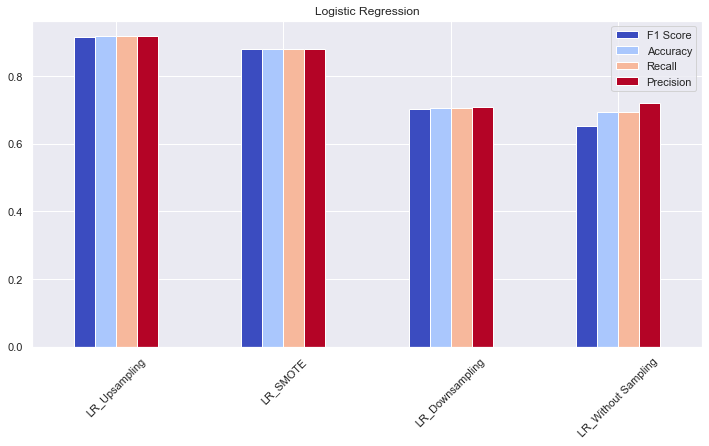

In [36]:
lr_df.plot(kind='bar', stacked=False, title='Logistic Regression', rot=45, colormap='coolwarm', figsize=(12,6))

#### 4.2.2 Naive Bayes<a id="naivebayes"></a>
[Table of Contents](#contents)

The Nave Bayes method is a supervised learning technique for addressing classification issues that is based on the Bayes theorem. It is mostly utilized in text classification tasks that require a large training dataset.

The Nave Bayes Classifier is a simple and effective classification method that aids in the development of fast machine learning models capable of making quick predictions<sup>4</sup>.

In `sklearn`, there three implementations of the Naive Bayes method which are:

   i) **Gaussian:** It is used in classification and it assumes that features follow a normal distribution.

   ii) **Multinomial:** It is used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.

   iii) **Bernoulli:** The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with a ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.
   
To train our model using Naive Bayes, we shall only implement the `MultinomialNB` Naive Bayes model.

In [37]:
# Instantiating the MultinomialNB Naive Bayes model
nb = MultinomialNB()

In [38]:
%%time
# without resampling
nb_f1, nb_acc, nb_rec, nb_pre = train_model(nb, X, y)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.


Accuracy:  0.6494943109987358
f1_score:  0.5713661161877688
Recall:  0.6494943109987358
Precision:  0.7524242770298193


COMET INFO: ----------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ----------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics:
COMET INFO:     Accuracy  : 0.6494943109987358
COMET INFO:     Precision : 0.7524242770298193
COMET INFO:     Recall    : 0.6494943109987358
COMET INFO:     f1_score  : 0.5713661161877688
COMET INFO:   Others:
COMET INFO:     offline_experiment : True
COMET INFO:   Uploads:
COMET INFO:     conda-info               : 1
COMET INFO:     conda-specification      : 1
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (8.79 MB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 

Wall time: 9.31 s


In [39]:
%%time
# With upsampling
nb_up_f1, nb_up_acc, nb_up_rec, nb_up_pre = train_model(nb, X_upsample, y_upsample)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.


Accuracy:  0.8708968347010551
f1_score:  0.8643130460145838
Recall:  0.8708968347010551
Precision:  0.8771277991190594


COMET INFO: ----------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ----------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics:
COMET INFO:     Accuracy  : 0.8708968347010551
COMET INFO:     Precision : 0.8771277991190594
COMET INFO:     Recall    : 0.8708968347010551
COMET INFO:     f1_score  : 0.8643130460145838
COMET INFO:   Others:
COMET INFO:     offline_experiment : True
COMET INFO:   Uploads:
COMET INFO:     conda-info               : 1
COMET INFO:     conda-specification      : 1
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (8.79 MB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 

Wall time: 11.3 s


In [40]:
%%time
# With downsampling
nb_down_f1, nb_down_acc, nb_down_rec, nb_down_pre = train_model(nb, X_downsample, y_downsample)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.


Accuracy:  0.7020250723240116
f1_score:  0.7007496183188843
Recall:  0.7020250723240116
Precision:  0.7046394212208069


COMET INFO: ----------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ----------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics:
COMET INFO:     Accuracy  : 0.7020250723240116
COMET INFO:     Precision : 0.7046394212208069
COMET INFO:     Recall    : 0.7020250723240116
COMET INFO:     f1_score  : 0.7007496183188843
COMET INFO:   Others:
COMET INFO:     offline_experiment : True
COMET INFO:   Uploads:
COMET INFO:     conda-info               : 1
COMET INFO:     conda-specification      : 1
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (8.79 MB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 

Wall time: 11.4 s


In [41]:
%%time
#With SMOTE
nb_smote_f1, nb_smote_acc, nb_smote_rec, nb_smote_pre = train_model(nb, MinMaxScaler().fit_transform(X_smote.todense()), 
                                                                                                        y_smote,'smote')

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.


Accuracy:  0.7026670574443142
f1_score:  0.6857544604190499
Recall:  0.7026670574443142
Precision:  0.8055950134586252


COMET INFO: ----------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ----------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics:
COMET INFO:     Accuracy  : 0.7026670574443142
COMET INFO:     Precision : 0.8055950134586252
COMET INFO:     Recall    : 0.7026670574443142
COMET INFO:     f1_score  : 0.6857544604190499
COMET INFO:   Others:
COMET INFO:     offline_experiment : True
COMET INFO:   Uploads:
COMET INFO:     conda-info               : 1
COMET INFO:     conda-specification      : 1
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (8.73 MB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 

Wall time: 15min 54s


In [45]:
nb_dict = { 'F1 Score': [nb_f1, nb_up_f1, nb_down_f1, nb_smote_f1 ], 'Accuracy': [nb_acc, nb_up_acc, nb_down_acc, nb_smote_acc], 
          'Recall': [nb_rec, nb_up_rec, nb_down_rec, nb_smote_rec], 
           'Precision': [nb_pre, nb_up_pre, nb_down_pre, nb_smote_pre]} 
nb_df = pd.DataFrame(nb_dict, index = ['NB_Without Sampling', 'NB_Upsampling', 'NB_Downsampling', 
                                       'NB_SMOTE']).sort_values('F1 Score', ascending=False)
nb_df

,F1 Score,Accuracy,Recall,Precision
NB_Upsampling,0.864313,0.870897,0.870897,0.877128
NB_Downsampling,0.700750,0.702025,0.702025,0.704639
NB_SMOTE,0.685754,0.702667,0.702667,0.805595
NB_Without Sampling,0.571366,0.649494,0.649494,0.752424


<AxesSubplot:title={'center':'Multinomial Naive Bayes'}>

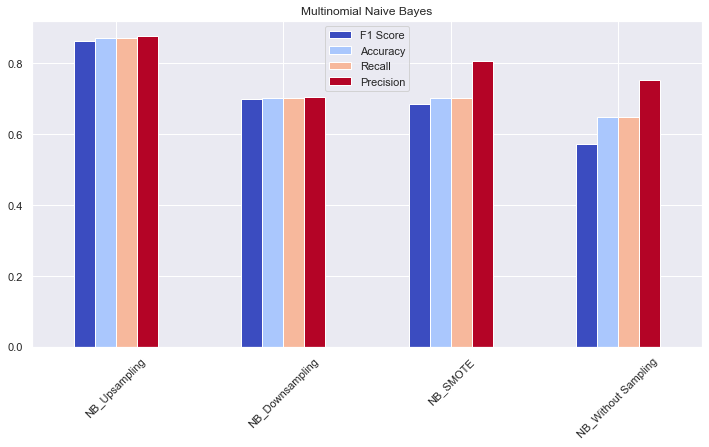

In [46]:
nb_df.plot(kind='bar', stacked=False, title='Multinomial Naive Bayes', rot=45, colormap='coolwarm', figsize=(12,6))

#### 4.2.3 Support Vector Machine Models<a id="linearsvc"></a>
[Table of Contents](#contents)

Support Vector Machines are classified as a classification method, but they can be used to solve both classification and regression problems. It can handle both continuous and categorical variables with ease. To differentiate various classes, SVM creates a hyperplane in multidimensional space. It iteratively generates the best hyperplane, which is then utilized to minimize an error. The goal of SVM is to find a maximum marginal hyperplane (MMH) that splits a dataset into classes as evenly as possible<sup>3</sup>.

In this session, we shall apply the Support Vector Machine models as we deploy the various kernel available in the SVM model.

##### SVM Kernels

A kernel is used to implement the SVM algorithm in practice. An input data space is transformed into the appropriate form using a kernel. The kernel trick is a technique used by SVM. The kernel transforms a low-dimensional input space into a higher-dimensional space in this case. To put it another way, it turns nonseparable issues into separable problems by adding more dimensions to them. It is most beneficial in problems with non-linear separation. The kernel trick aids in the development of a more accurate classifier.

We shall apply the following kernels:
- Linear Kernel
- Polynomial Kernel
- Radial Basis Function Kernel

#### LinearSVC Model

In [47]:
# Instantiating the Linear SVC model
lsvc = svm.SVC(kernel='linear') # Linear Kernel

In [48]:
%%time
# without resampling
lsvc_f1, lsvc_acc, lsvc_rec, lsvc_pre = train_model(lsvc, X, y)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: ----------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ----------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics:
COMET INFO:     Accuracy  : 0.7139696586599241
COMET INFO:     Precision : 0.7134397087972054
COMET INFO:     Recall    : 0.7139696586599241
COMET INFO:     f1_score  : 0.693930359520463
COMET INFO:   Others:
COMET INFO:     offline_experiment : True
COMET INFO:   Uploads:

Accuracy:  0.7139696586599241
f1_score:  0.693930359520463
Recall:  0.7139696586599241
Precision:  0.7134397087972054


COMET INFO: Starting saving the offline archive
COMET INFO: To upload this offline experiment, run:
    comet upload /experiments1\89d33d5ea91f44fca1ecd966e5e5eb6c.zip


Wall time: 2min 47s


In [49]:
%%time
# With upsampling
lsvc_up_f1, lsvc_up_acc, lsvc_up_rec, lsvc_up_pre = train_model(lsvc, X_upsample, y_upsample)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: ----------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ----------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics:
COMET INFO:     Accuracy  : 0.9299531066822978
COMET INFO:     Precision : 0.9294977026271514
COMET INFO:     Recall    : 0.9299531066822978
COMET INFO:     f1_score  : 0.9291406404132172
COMET INFO:   Others:
COMET INFO:     offline_experiment : True
COMET INFO:   Uploads

Accuracy:  0.9299531066822978
f1_score:  0.9291406404132172
Recall:  0.9299531066822978
Precision:  0.9294977026271514


COMET INFO: Starting saving the offline archive
COMET INFO: To upload this offline experiment, run:
    comet upload /experiments1\1ae6c2d8bda14571add200f5478d4bf3.zip


Wall time: 11min 8s


In [50]:
%%time
# With downsampling
lsvc_down_f1, lsvc_down_acc, lsvc_down_rec, lsvc_down_pre = train_model(lsvc, X_downsample, y_downsample)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: ----------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ----------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics:
COMET INFO:     Accuracy  : 0.703953712632594
COMET INFO:     Precision : 0.707885899823814
COMET INFO:     Recall    : 0.703953712632594
COMET INFO:     f1_score  : 0.7033371819252744
COMET INFO:   Others:
COMET INFO:     offline_experiment : True
COMET INFO:   Uploads:
C

Accuracy:  0.703953712632594
f1_score:  0.7033371819252744
Recall:  0.703953712632594
Precision:  0.707885899823814


COMET INFO: Starting saving the offline archive
COMET INFO: To upload this offline experiment, run:
    comet upload /experiments1\c871684c4f654ac9a317e7154dc959c8.zip


Wall time: 13.4 s


In [51]:
%%time
#With SMOTE
lsvc_smote_f1, lsvc_smote_acc, lsvc_smote_rec, lsvc_smote_pre = train_model(lsvc, X_smote, y_smote, 'smote')

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: ----------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ----------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics:
COMET INFO:     Accuracy  : 0.9075322391559203
COMET INFO:     Precision : 0.9070599624381034
COMET INFO:     Recall    : 0.9075322391559203
COMET INFO:     f1_score  : 0.906906632219735
COMET INFO:   Others:
COMET INFO:     offline_experiment : True
COMET INFO:   Uploads:

Accuracy:  0.9075322391559203
f1_score:  0.906906632219735
Recall:  0.9075322391559203
Precision:  0.9070599624381034


COMET INFO: Starting saving the offline archive
COMET INFO: To upload this offline experiment, run:
    comet upload /experiments1\9b8f569b0a8d4ba1a92ffb03bd439c4d.zip


Wall time: 8min 36s


In [52]:
lsvc_dict = { 'F1 Score': [lsvc_f1, lsvc_up_f1, lsvc_down_f1, lsvc_smote_f1 ], 
             'Accuracy': [lsvc_acc, lsvc_up_acc, lsvc_down_acc, lsvc_smote_acc], 
          'Recall': [lsvc_rec, lsvc_up_rec, lsvc_down_rec, lsvc_smote_rec], 
           'Precision': [lsvc_pre, lsvc_up_pre, lsvc_down_pre, lsvc_smote_pre]} 
lsvc_df = pd.DataFrame(lsvc_dict, index = ['lsvc_Without Sampling', 'lsvc_Upsampling', 'lsvc_Downsampling', 
                                           'lsvc_SMOTE']).sort_values('F1 Score', ascending=False)
lsvc_df

,F1 Score,Accuracy,Recall,Precision
lsvc_Upsampling,0.929141,0.929953,0.929953,0.929498
lsvc_SMOTE,0.906907,0.907532,0.907532,0.907060
lsvc_Downsampling,0.703337,0.703954,0.703954,0.707886
lsvc_Without Sampling,0.693930,0.713970,0.713970,0.713440


<AxesSubplot:title={'center':'Linear SVC'}>

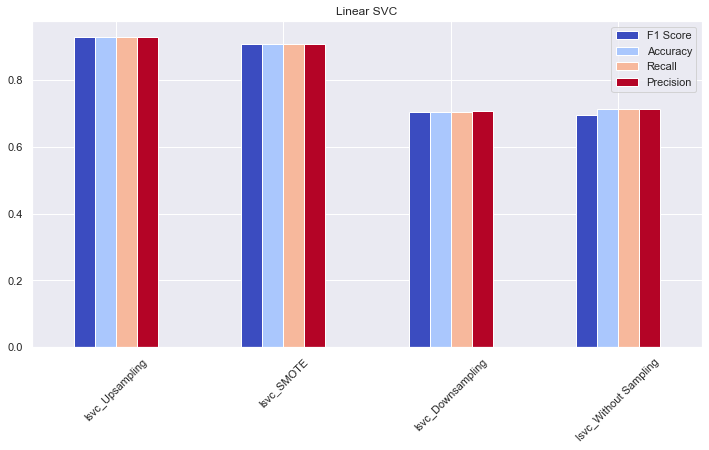

In [53]:
lsvc_df.plot(kind='bar', stacked=False, title='Linear SVC', rot=45, colormap='coolwarm', figsize=(12,6))

#### PolynomialSVC Model

In machine learning, the polynomial kernel is a kernel function commonly used with support vector machines (SVMs) and other kernelized models, that represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables, allowing learning of non-linear models.

Intuitively, the polynomial kernel looks not only at the given features of input samples to determine their similarity, but also combinations of these. In the context of regression analysis, such combinations are known as interaction features. The (implicit) feature space of a polynomial kernel is equivalent to that of polynomial regression, but without the combinatorial blowup in the number of parameters to be learned. When the input features are binary-valued (booleans), then the features correspond to logical conjunctions of input features

In [54]:
# Instantiating the Polynomial SVC model
psvc = svm.SVC(kernel='poly') # Polynomial Kernel

In [55]:
%%time
# without resampling
psvc_f1, psvc_acc, psvc_rec, psvc_pre = train_model(psvc, X, y)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: ----------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ----------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics:
COMET INFO:     Accuracy  : 0.6466498103666245
COMET INFO:     Precision : 0.7502199921233953
COMET INFO:     Recall    : 0.6466498103666245
COMET INFO:     f1_score  : 0.577242833766
COMET INFO:   Others:
COMET INFO:     offline_experiment : True
COMET INFO:   Uploads:
CO

Accuracy:  0.6466498103666245
f1_score:  0.577242833766
Recall:  0.6466498103666245
Precision:  0.7502199921233953


COMET INFO: Starting saving the offline archive
COMET INFO: To upload this offline experiment, run:
    comet upload /experiments1\62f961f6e2814656b4f8095360fe384c.zip


Wall time: 3min 3s


In [56]:
%%time
# With upsampling
psvc_up_f1, psvc_up_acc, psvc_up_rec, psvc_up_pre = train_model(psvc, X_upsample, y_upsample)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: ----------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ----------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics:
COMET INFO:     Accuracy  : 0.9579425556858148
COMET INFO:     Precision : 0.9609827769214705
COMET INFO:     Recall    : 0.9579425556858148
COMET INFO:     f1_score  : 0.9583738483649967
COMET INFO:   Others:
COMET INFO:     offline_experiment : True
COMET INFO:   Uploads

Accuracy:  0.9579425556858148
f1_score:  0.9583738483649967
Recall:  0.9579425556858148
Precision:  0.9609827769214705


COMET INFO: Starting saving the offline archive
COMET INFO: To upload this offline experiment, run:
    comet upload /experiments1\44da0c6554b3414d9deaa6c6aecbcc6f.zip


Wall time: 1h 22min 48s


In [57]:
%%time
# With downsampling
psvc_down_f1, psvc_down_acc, psvc_down_rec, psvc_down_pre = train_model(psvc, X_downsample, y_downsample)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET WARNING: Failed to log ip
COMET INFO: ----------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ----------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics:
COMET INFO:     Accuracy  : 0.5477338476374156
COMET INFO:     Precision : 0.7733587799376409
COMET INFO:     Recall    : 0.5477338476374156
COMET INFO:     f1_score  : 0.5550452163354244
COMET INFO:   Others:
COMET INFO:     offline_experim

Accuracy:  0.5477338476374156
f1_score:  0.5550452163354244
Recall:  0.5477338476374156
Precision:  0.7733587799376409


COMET INFO: Starting saving the offline archive
COMET INFO: To upload this offline experiment, run:
    comet upload /experiments1\eb932440b3934b139e622e64d6b97073.zip


Wall time: 12.4 s


In [58]:
%%time
#With SMOTE
psvc_smote_f1, psvc_smote_acc, psvc_smote_rec, psvc_smote_pre = train_model(psvc, X_smote, y_smote, 'smote')

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET WARNING: Failed to log ip
COMET INFO: ----------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ----------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics:
COMET INFO:     Accuracy  : 0.904601406799531
COMET INFO:     Precision : 0.920815910660825
COMET INFO:     Recall    : 0.904601406799531
COMET INFO:     f1_score  : 0.9067887042715908
COMET INFO:   Others:
COMET INFO:     offline_experiment

Accuracy:  0.904601406799531
f1_score:  0.9067887042715908
Recall:  0.904601406799531
Precision:  0.920815910660825


COMET INFO: Starting saving the offline archive
COMET INFO: To upload this offline experiment, run:
    comet upload /experiments1\c7f3c00a7b424f5bad6e36cff854e1ff.zip


Wall time: 10min 54s


In [59]:
psvc_dict = { 'F1 Score': [psvc_f1, psvc_up_f1, psvc_down_f1, psvc_smote_f1 ], 
             'Accuracy': [psvc_acc, psvc_up_acc, psvc_down_acc, psvc_smote_acc], 
          'Recall': [psvc_rec, psvc_up_rec, psvc_down_rec, psvc_smote_rec], 
           'Precision': [psvc_pre, psvc_up_pre, psvc_down_pre, psvc_smote_pre]} 
psvc_df = pd.DataFrame(psvc_dict, index = ['psvc_Without Sampling', 'psvc_Upsampling', 'psvc_Downsampling', 
                                           'psvc_SMOTE']).sort_values('F1 Score', ascending=False)
psvc_df

,F1 Score,Accuracy,Recall,Precision
psvc_Upsampling,0.958374,0.957943,0.957943,0.960983
psvc_SMOTE,0.906789,0.904601,0.904601,0.920816
psvc_Without Sampling,0.577243,0.646650,0.646650,0.750220
psvc_Downsampling,0.555045,0.547734,0.547734,0.773359


<AxesSubplot:title={'center':'Polynomial SVC'}>

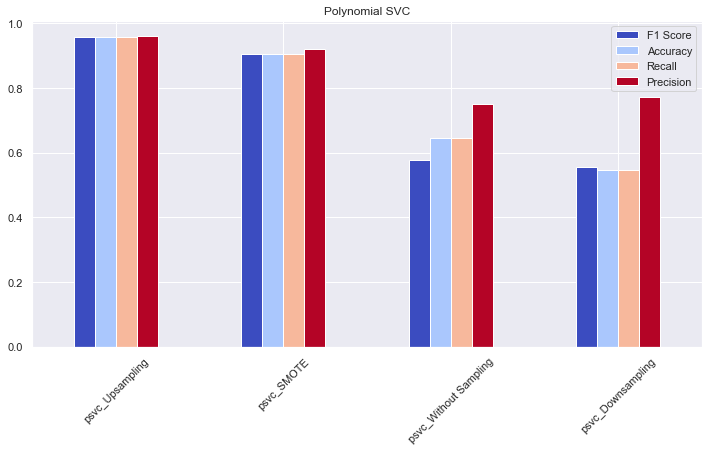

In [60]:
psvc_df.plot(kind='bar', stacked=False, title='Polynomial SVC', rot=45, colormap='coolwarm', figsize=(12,6))

#### Radial Basis Function Model

Radial basis function (RBF) networks have a fundamentally different architecture than most neural network architectures. Most neural network architecture consists of many layers and introduces nonlinearity by repetitively applying nonlinear activation functions. RBF network on the other hand only consists of an input layer, a single hidden layer, and an output layer.

The input layer is not a computation layer, it just receives the input data and feeds it into the special hidden layer of the RBF network. The computation that is happened inside the hidden layer is very different from most neural networks, and this is where the power of the RBF network comes from. The output layer performs the prediction task such as classification or regression.

In [61]:
# Instantiating the Radial Basis Function SVC model
rsvc = svm.SVC(kernel='rbf') # Radial Basis Function Kernel

In [62]:
%%time
# without resampling
rsvc_f1, rsvc_acc, rsvc_rec, rsvc_pre = train_model(rsvc, X, y)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET WARNING: Failed to log ip
COMET INFO: ----------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ----------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics:
COMET INFO:     Accuracy  : 0.6792035398230089
COMET INFO:     Precision : 0.7459483134880424
COMET INFO:     Recall    : 0.6792035398230089
COMET INFO:     f1_score  : 0.6263813964487528
COMET INFO:   Others:
COMET INFO:     offline_experim

Accuracy:  0.6792035398230089
f1_score:  0.6263813964487528
Recall:  0.6792035398230089
Precision:  0.7459483134880424


COMET INFO: Starting saving the offline archive
COMET INFO: To upload this offline experiment, run:
    comet upload /experiments1\1ca635b336a349689c5248f1667efce3.zip


Wall time: 2min 36s


In [63]:
%%time
# With upsampling
rsvc_up_f1, rsvc_up_acc, rsvc_up_rec, rsvc_up_pre = train_model(rsvc, X_upsample, y_upsample)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET WARNING: Failed to log ip
COMET INFO: ----------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ----------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics:
COMET INFO:     Accuracy  : 0.9529601406799532
COMET INFO:     Precision : 0.9534231537392197
COMET INFO:     Recall    : 0.9529601406799532
COMET INFO:     f1_score  : 0.9531038292285238
COMET INFO:   Others:
COMET INFO:     offline_experim

Accuracy:  0.9529601406799532
f1_score:  0.9531038292285238
Recall:  0.9529601406799532
Precision:  0.9534231537392197


COMET INFO: Starting saving the offline archive
COMET INFO: To upload this offline experiment, run:
    comet upload /experiments1\b27391d8bccf44098c53885cd1a6f7a3.zip


Wall time: 11min 19s


In [64]:
%%time
# With downsampling
rsvc_down_f1, rsvc_down_acc, rsvc_down_rec, rsvc_down_pre = train_model(rsvc, X_downsample, y_downsample)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET WARNING: Failed to log ip
COMET INFO: ----------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ----------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics:
COMET INFO:     Accuracy  : 0.6923818707810994
COMET INFO:     Precision : 0.7158756871891203
COMET INFO:     Recall    : 0.6923818707810994
COMET INFO:     f1_score  : 0.6909321464169743
COMET INFO:   Others:
COMET INFO:     offline_experim

Accuracy:  0.6923818707810994
f1_score:  0.6909321464169743
Recall:  0.6923818707810994
Precision:  0.7158756871891203


COMET INFO: Starting saving the offline archive
COMET INFO: To upload this offline experiment, run:
    comet upload /experiments1\396793036d8e47f680d1ec320b1cda0f.zip


Wall time: 13.4 s


In [65]:
%%time
#With SMOTE
rsvc_smote_f1, rsvc_smote_acc, rsvc_smote_rec, rsvc_smote_pre = train_model(rsvc, X_smote, y_smote, 'smote')

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET WARNING: Failed to log ip
COMET INFO: ----------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ----------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics:
COMET INFO:     Accuracy  : 0.925263774912075
COMET INFO:     Precision : 0.9272695326396104
COMET INFO:     Recall    : 0.925263774912075
COMET INFO:     f1_score  : 0.9257183060616644
COMET INFO:   Others:
COMET INFO:     offline_experimen

Accuracy:  0.925263774912075
f1_score:  0.9257183060616644
Recall:  0.925263774912075
Precision:  0.9272695326396104


COMET INFO: Starting saving the offline archive
COMET INFO: To upload this offline experiment, run:
    comet upload /experiments1\07e1379a76ba4b4d97e3c8591d56bca7.zip


Wall time: 11min 35s


In [66]:
rsvc_dict = { 'F1 Score': [rsvc_f1, rsvc_up_f1, rsvc_down_f1, rsvc_smote_f1 ], 
             'Accuracy': [rsvc_acc, rsvc_up_acc, rsvc_down_acc, rsvc_smote_acc], 
          'Recall': [rsvc_rec, rsvc_up_rec, rsvc_down_rec, rsvc_smote_rec], 
           'Precision': [rsvc_pre, rsvc_up_pre, rsvc_down_pre, rsvc_smote_pre]} 
rsvc_df = pd.DataFrame(rsvc_dict, index = ['rsvc_Without Sampling', 'rsvc_Upsampling', 'rsvc_Downsampling', 
                                           'rsvc_SMOTE']).sort_values('F1 Score', ascending=False)
rsvc_df

,F1 Score,Accuracy,Recall,Precision
rsvc_Upsampling,0.953104,0.952960,0.952960,0.953423
rsvc_SMOTE,0.925718,0.925264,0.925264,0.927270
rsvc_Downsampling,0.690932,0.692382,0.692382,0.715876
rsvc_Without Sampling,0.626381,0.679204,0.679204,0.745948


In [ ]:
rsvc_df.plot(kind='bar', stacked=False, title='Radial Basis', rot=45, colormap='coolwarm', figsize=(12,6))

#### 4.24 XGBOOST

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. 

In [68]:
# Instantiating the Radial Basis Function SVC model
xg = xgb.XGBClassifier() # Radial Basis Function Kernel

In [69]:
%%time
# without resampling
xg_f1, xg_acc, xg_rec, xg_pre = train_model(xg, X, y)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET WARNING: Failed to log ip
COMET INFO: ----------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ----------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics:
COMET INFO:     Accuracy  : 0.6687737041719343
COMET INFO:     Precision : 0.6602535457652188
COMET INFO:     Recall    : 0.6687737041719343
COMET INFO:     f1_score  : 0.6491065410038238
COMET INFO:   Others:
COMET INFO:     offline_experim

Accuracy:  0.6687737041719343
f1_score:  0.6491065410038238
Recall:  0.6687737041719343
Precision:  0.6602535457652188


COMET INFO: Starting saving the offline archive
COMET INFO: To upload this offline experiment, run:
    comet upload /experiments1\3c6627188d1144d8962214ffb093d87c.zip


Wall time: 26.8 s


In [70]:
%%time
# With upsampling
xg_up_f1, xg_up_acc, xg_up_rec, xg_up_pre = train_model(xg, X_upsample, y_upsample)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET WARNING: Failed to log ip
COMET INFO: ----------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ----------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics:
COMET INFO:     Accuracy  : 0.7233294255568582
COMET INFO:     Precision : 0.7164375932234174
COMET INFO:     Recall    : 0.7233294255568582
COMET INFO:     f1_score  : 0.7094205968140592
COMET INFO:   Others:
COMET INFO:     offline_experim

Accuracy:  0.7233294255568582
f1_score:  0.7094205968140592
Recall:  0.7233294255568582
Precision:  0.7164375932234174


COMET INFO: Starting saving the offline archive
COMET INFO: To upload this offline experiment, run:
    comet upload /experiments1\c048b484a46445089fb02b554aa69cbb.zip


Wall time: 40.9 s


In [71]:
%%time
# With downsampling
xg_down_f1, xg_down_acc, xg_down_rec, xg_down_pre = train_model(xg, X_downsample, y_downsample)

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET WARNING: Failed to log ip


Accuracy:  0.5978784956605593
f1_score:  0.5952047674354131
Recall:  0.5978784956605593
Precision:  0.6332181140064084


COMET INFO: ----------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ----------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics:
COMET INFO:     Accuracy  : 0.5978784956605593
COMET INFO:     Precision : 0.6332181140064084
COMET INFO:     Recall    : 0.5978784956605593
COMET INFO:     f1_score  : 0.5952047674354131
COMET INFO:   Others:
COMET INFO:     offline_experiment : True
COMET INFO:   Uploads:
COMET INFO:     conda-info               : 1
COMET INFO:     conda-specification      : 1
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (8.87 MB)
COMET INFO:     installed packages       : 1
COMET INFO:     notebook                 : 1
COMET INFO:     source_code              : 

Wall time: 12.4 s


In [72]:
%%time
#With SMOTE
xg_smote_f1, xg_smote_acc, xg_smote_rec, xg_smote_pre = train_model(xg, X_smote, y_smote, 'smote')

COMET WARNING: Comet has disabled auto-logging functionality as it has been imported after the following ML modules: xgboost, sklearn. Metrics and hyperparameters can still be logged using comet_ml.log_metrics() and comet_ml.log_parameters()
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET WARNING: Failed to log ip
COMET INFO: ----------------------------------
COMET INFO: Comet.ml OfflineExperiment Summary
COMET INFO: ----------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : [OfflineExperiment will get URL after upload]
COMET INFO:   Metrics:
COMET INFO:     Accuracy  : 0.828253223915592
COMET INFO:     Precision : 0.8328122474584834
COMET INFO:     Recall    : 0.828253223915592
COMET INFO:     f1_score  : 0.8296246577441344
COMET INFO:   Others:
COMET INFO:     offline_experimen

Accuracy:  0.828253223915592
f1_score:  0.8296246577441344
Recall:  0.828253223915592
Precision:  0.8328122474584834


COMET INFO: Starting saving the offline archive
COMET INFO: To upload this offline experiment, run:
    comet upload /experiments1\3963e42ef51f4741859a9b678bee0d1c.zip


Wall time: 39.9 s


In [73]:
xg_dict = { 'F1 Score': [xg_f1, xg_up_f1, xg_down_f1, xg_smote_f1 ], 
             'Accuracy': [xg_acc, xg_up_acc, xg_down_acc, xg_smote_acc], 
          'Recall': [xg_rec, xg_up_rec, xg_down_rec, xg_smote_rec], 
           'Precision': [xg_pre, xg_up_pre, xg_down_pre, xg_smote_pre]} 
xg_df = pd.DataFrame(xg_dict, index = ['xg_Without Sampling', 'xg_Upsampling', 'xg_Downsampling', 
                                       'xg_SMOTE']).sort_values('F1 Score', ascending=False)
xg_df

,F1 Score,Accuracy,Recall,Precision
xg_SMOTE,0.829625,0.828253,0.828253,0.832812
xg_Upsampling,0.709421,0.723329,0.723329,0.716438
xg_Without Sampling,0.649107,0.668774,0.668774,0.660254
xg_Downsampling,0.595205,0.597878,0.597878,0.633218


<AxesSubplot:title={'center':'Extreme Gradient Boosting'}>

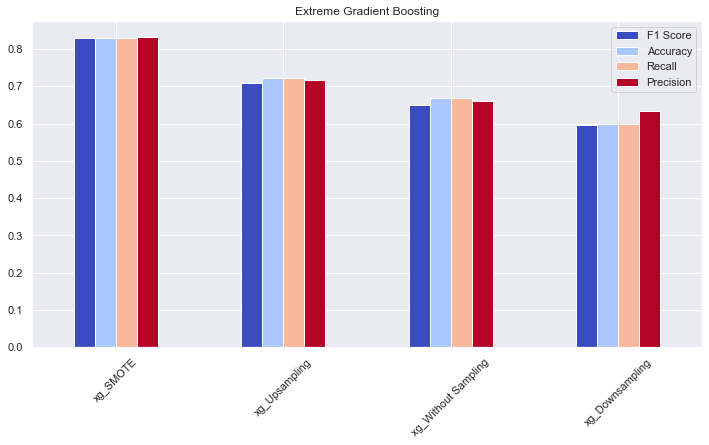

In [78]:
xg_df.plot(kind='bar', stacked=False, title='Extreme Gradient Boosting', rot=45, colormap='coolwarm', figsize=(12,6))

## Model Evaluation

At this point, we shall evaluate our models by critically studying the different metrics calculated for each model above. Already, we have generated the classification report of each model trained which contains some metrics which shall be briefly discussed below:

- **Precision**: Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
- **Recall**: Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
- **F1 score**: A combination (harmonic mean) of precission and recall. A perfect model achieves an F1 score of 1.0.
- **Support**: The number of samples each metric was calculated on.
- **Accuracy**: The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
- **Macro avg**: Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into account so if you do have class imbalances, pay attention to this metric.
- **Weighted avg**: Short for weighted average, the weighted average of precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples are there in each class. This metric will favour the majority class (e.g. will give a high value when one class out performs another due to having more samples).

In [81]:
report = pd.concat([lr_df, nb_df, lsvc_df, rsvc_df, psvc_df, xg_df]).sort_values('F1 Score', ascending=False)
report

,F1 Score,Accuracy,Recall,Precision
psvc_Upsampling,0.958374,0.957943,0.957943,0.960983
rsvc_Upsampling,0.953104,0.952960,0.952960,0.953423
lsvc_Upsampling,0.929141,0.929953,0.929953,0.929498
rsvc_SMOTE,0.925718,0.925264,0.925264,0.927270
LR_Upsampling,0.916071,0.917644,0.917644,0.917839
lsvc_SMOTE,0.906907,0.907532,0.907532,0.907060
psvc_SMOTE,0.906789,0.904601,0.904601,0.920816
LR_SMOTE,0.879354,0.880422,0.880422,0.879901
NB_Upsampling,0.864313,0.870897,0.870897,0.877128
xg_SMOTE,0.829625,0.828253,0.828253,0.832812


**Creating a bar plot to compare the accuracy scores visually**

<AxesSubplot:>

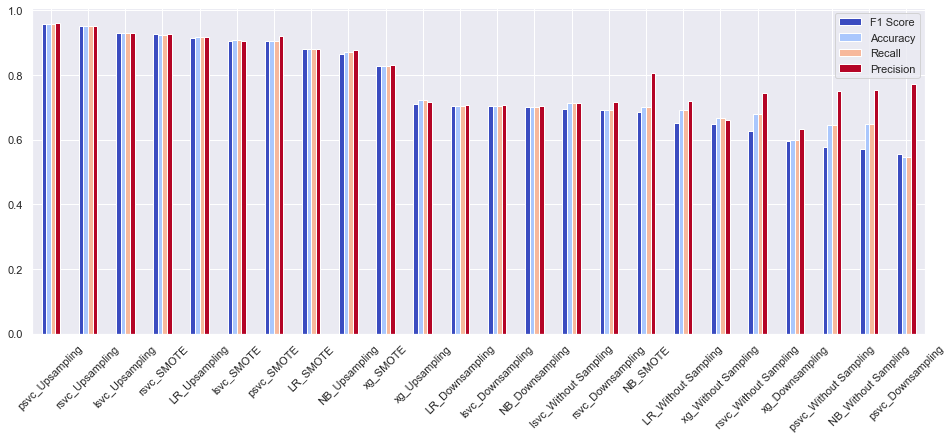

In [82]:
report.plot(kind='bar', stacked=False, rot=45, colormap='coolwarm', figsize=(16,6))

In [104]:
test = df_test2['cleaned_message']
test_smote = vect.transform(test)

In [105]:
#create predict function
def model_predict(model, X, y, test, smote='No'):
    
    pipe = Pipeline([('vect', TfidfVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 3))),('tfidf', TfidfTransformer()),('model', model)])
    
    if smote == 'No':
        pipe.fit(X, y)
        y_pred = pipe.predict(test)
    
    else:
        model.fit(X, y)
        y_pred = model.predict(test)
        

    return y_pred
    

In [ ]:
%%time
y_pred_psvc_up = model_predict(psvc, X_upsample, y_upsample, test)
y_pred_lsvc_up = model_predict(lsvc, X_upsample, y_upsample, test)
y_pred_rsvc_smote = model_predict(rsvc, X_smote, y_smote, test_smote, 'yes')
y_pred_lsvc_smote = model_predict(lsvc, X_smote, y_smote, test_smote, 'yes')
y_pred_psvc_smote = model_predict(psvc, X_smote, y_smote, test_smote, 'yes')
y_pred_lr_smote = model_predict(lr, X_smote, y_smote, test_smote, 'yes')
y_pred_xg_smote = model_predict(xg, X_smote, y_smote, test_smote, 'yes')
y_pred_nb_up = model_predict(nb, X_upsample, y_upsample, test)
y_pred_xg_up = model_predict(xg, X_upsample, y_upsample, test)
y_pred_lr_down = model_predict(lr, X_downsample, y_downsample, test)
y_pred_lsvc_down = model_predict(lsvc, X_downsample, y_downsample, test)
y_pred_nb_down = model_predict(nb, X_downsample, y_downsample, test)
y_pred_rsvc_down = model_predict(rsvc, X_downsample, y_downsample, test)
y_pred_nb = model_predict(nb, X, y, test)
y_pred_xg = model_predict(xg, X, y, test)
y_pred_lsvc = model_predict(lsvc, X, y, test)

## Model Improvement
To improve our model score, we shall be employing the following ensemble methods:
* Bagging 
* Stacking
* Soft Voting
* Hard Voting

In [130]:
#Bagging
clf = BaggingClassifier(base_estimator=svm.LinearSVC(),
                       n_estimators=10, random_state=0)
pipe_clf = Pipeline([('vect', TfidfVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 2))),('model', clf)])
pipe_clf.fit(X, y)
scores = cross_val_score(pipe_clf, X, y, scoring='f1_weighted', cv=2)
print(scores)
print(scores.mean())

[0.68592831 0.70093229]
0.6934303007707052


In [132]:
#Stacking
#define multinomial naive bayes base model
nb = MultinomialNB()
pipe1 = Pipeline([('vect', TfidfVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 2))),('model', nb)])
pipe1.fit(X, y)

#define linearsvc base model
from sklearn.calibration import CalibratedClassifierCV
ls = CalibratedClassifierCV(svm.LinearSVC(C=10))
pipe2 = Pipeline([('vect', TfidfVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 2))),('model', ls)])
pipe2.fit(X, y)

#stack naive bayes, multinomial and bagging model using logistic regression as meta learner
models = [("nb", pipe1),("bag", pipe_clf), ('lsvc', pipe2)]
meta_learner_reg = LogisticRegression()

s_clf = StackingClassifier(estimators=models, final_estimator=meta_learner_reg)
s_clf.fit(X, y)

scores = cross_val_score(s_clf, X, y, scoring='f1_weighted', cv=2)
print(scores)
print(scores.mean())

[0.69366996 0.70093425]
0.6973021076656676


In [134]:
# Soft Voting
models = [("nb", pipe1),("bag", pipe_clf), ('lsvc', pipe2)]
v_clf = VotingClassifier(estimators=models, voting='soft')
v_clf.fit(X, y)

scores = cross_val_score(v_clf, X, y, scoring='f1_weighted', cv=2)
print(scores)
print(scores.mean())

[0.67393343 0.69134207]
0.6826377536812961


In [135]:
# hard Voting
models = [("nb", pipe1),("bag", pipe_clf), ('lsvc', pipe2)]
v_clf2 = VotingClassifier(estimators=models, voting='soft')
v_clf2.fit(X, y)

scores = cross_val_score(v_clf2, X, y, scoring='f1_weighted', cv=2)
print(scores)
print(scores.mean())

[0.67393343 0.69134207]
0.6826377536812961


## 5. Conclusion and Recommendation<a id="conclusion_and_recommendation"></a>
[Table of Contents](#contents)

### 5.1 Conclusion<a id="conclusion"></a>
[Table of Contents](#contents)

From the tests we have carried out, we got some relatively high accuracy in prediction rate for our choice model, Linear SVC. This means that our solution can be confidently used to make any climate change predictions by feeding text into our model.

This solution saves time as well as human resources since there is no need for one to sit down and classify Tweets one by one. Instead, this solution can classify thousands of texts within minutes.


To top it all up, this solution is highly customizable to accommodate any other type of text classification be it classification of different types of sentiments or classification of documents, just to name a few.

### 5.2 Recommendation<a id="recommendation"></a>
[Table of Contents](#contents)

Due to luck of time, not all available models, algorithms  and variations were tested. We would therefore recommend that this solution be treated as a basis for an iterative process geared towards improving the prediction accuracy.

We also recommend that a larger dataset be collected for the purposes of training. This is because more data could help towards improving the machine learning process by providing a larger sample size for the models and algorithms to pick patterns from. For this, other social media platforms could be considered since Twitter has a limit when it comes to number of words used while other social media platforms allow for longer text messages. 

## 6. References<a id="references"></a>
[Table of Contents](#contents)

1. Stemming and lemmatization - Stanford NLP Group: https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html
2. Source code for nltk.corpus.reader.wordnet: https://www.nltk.org/_modules/nltk/corpus/reader/wordnet.html
3. Support Vector Machines with Scikit-learn Tutorial: https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python
4. Naïve Bayes Classifier Algorithm: https://www.javatpoint.com/machine-learning-naive-bayes-classifier
5. Climate Change: https://education.nationalgeographic.org/resource/climate-change
6. How To Supercharge Your Machine Learning Experiments with Comet.ml: https://analyticsindiamag.com/how-to-supercharge-your-machine-learning-experiments-with-comet-ml/#:~:text=Comet.ml%20is%20a%20Machine,code%20modifications%20and%20production%20models.
7. What is Exploratory Data Analysis?: https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15
8. What is a machine learning model?: https://docs.microsoft.com/en-us/windows/ai/windows-ml/what-is-a-machine-learning-model